In [14]:
from modeling import armar_dataset_modelado, transformar_a_dataset_agrupado, agregar_temporales_a_parquet
from src.utils import preprocesamiento_completo

In [2]:
preprocesamiento_completo()

NameError: name 'preprocesamiento_completo' is not defined


Generando dataset de TRAIN (años completos)...
Cargando viajes completos 2020 a 2024...


/Users/athinasalim/Desktop/Machine/FINAL_ML/modeling.py:152: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  pd.read_csv(os.path.join(recorridos_dir, f))


Cargando todos los usuarios (2015 a 2024)...


/Users/athinasalim/Desktop/Machine/FINAL_ML/modeling.py:167: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  pd.read_csv(f) for f in archivos_usuarios
/Users/athinasalim/Desktop/Machine/FINAL_ML/modeling.py:167: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  pd.read_csv(f) for f in archivos_usuarios
/Users/athinasalim/Desktop/Machine/FINAL_ML/modeling.py:167: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  pd.read_csv(f) for f in archivos_usuarios
/Users/athinasalim/Desktop/Machine/FINAL_ML/modeling.py:27: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(ruta)
/Users/athinasalim/Desktop/Machine/FINAL_ML/modeling.py:27: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(ruta)
/Users/athinasa

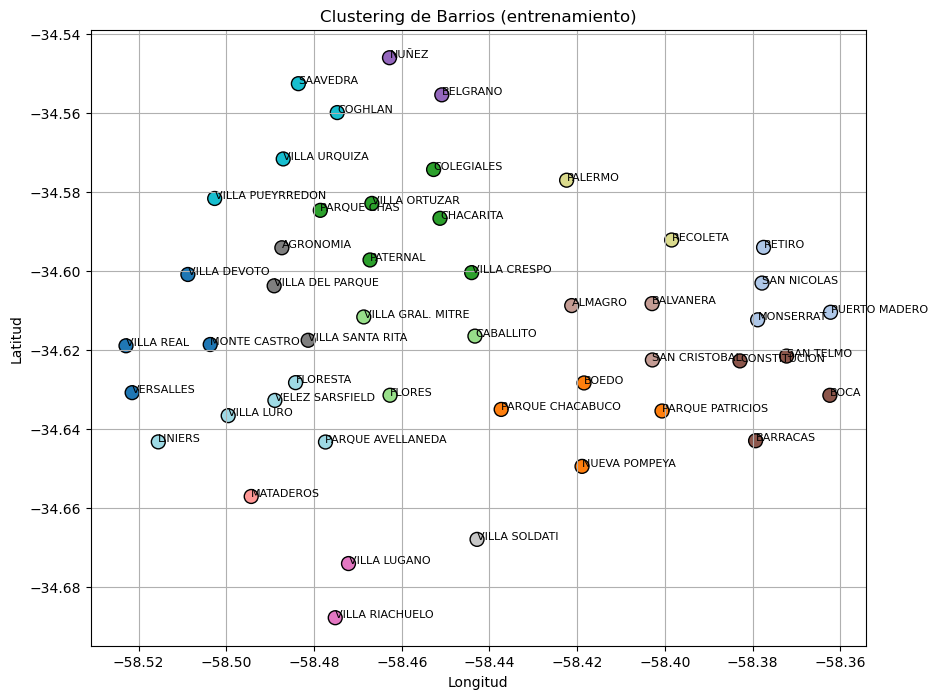

Clustering guardado en data/mapa_cluster_barrios.json y gráfico en data/modelado/cluster_barrios.png


Contando estaciones cercanas: 100%|██████████| 501/501 [00:10<00:00, 47.22it/s]


Dataset final guardado en data/modelado/ds_modelado_pre.csv
Parquet guardado en: data/modelado/ds_modelado_pre.parquet
Dataset de entrenamiento generado correctamente.


In [4]:
armar_dataset_modelado(test=False)


In [26]:
transformar_a_dataset_agrupado(
    path_parquet="data/modelado/ds_modelado_pre.parquet",
    output_path="data/modelado/ds_modelado_group.parquet")

✅ Calculados los lags y rolling para 'edad_usuario' sin leakage.
✅ Calculados los lags y rolling para 'usuario_registrado' sin leakage.
✅ Calculados los lags y rolling para 'genero_FEMALE' sin leakage.
✅ Calculados los lags y rolling para 'genero_MALE' sin leakage.
✅ Calculados los lags y rolling para 'genero_OTHER' sin leakage.
✅ Calculados los lags y rolling para 'modelo_bicicleta' sin leakage.
Dataset agrupado guardado en data/modelado/ds_modelado_group.parquet


In [16]:
import pandas as pd

# 📂 Ruta al archivo Parquet
path = "data/modelado/ds_modelado_group.parquet"

# 📥 Leer el archivo
try:
    df = pd.read_parquet(path)
    print("✅ Archivo cargado correctamente.")
except Exception as e:
    print("❌ Error al cargar el archivo:", e)

# 🔍 Verificar presencia de NaNs
nans = df.isna().sum()
total_nans = nans.sum()

if total_nans == 0:
    print("✅ No hay valores nulos en el dataset.")
else:
    print(f"⚠️ Hay {total_nans} valores nulos en total.")
    print("📌 Columnas con NaNs:")
    print(nans[nans > 0])

✅ Archivo cargado correctamente.
✅ No hay valores nulos en el dataset.


In [27]:
agregar_temporales_a_parquet("data/modelado/ds_modelado_group.parquet")

['id_estacion_origen',
 'fecha_intervalo',
 'N_arribos_intervalo',
 'N_salidas_intervalo',
 'zona_origen_cluster',
 'cantidad_estaciones_cercanas_origen',
 'dist_ciclovia_m',
 'ciclo_len_200m',
 'barrio_origen',
 'es_finde',
 'dia_semana',
 'hora_intervalo',
 'estacion_del_anio',
 'edad_usuario_anterior_1',
 'edad_usuario_anterior_2',
 'edad_usuario_anterior_3',
 'edad_usuario_rolling7',
 'usuario_registrado_anterior_1',
 'usuario_registrado_anterior_2',
 'usuario_registrado_anterior_3',
 'usuario_registrado_rolling7',
 'genero_FEMALE_anterior_1',
 'genero_FEMALE_anterior_2',
 'genero_FEMALE_anterior_3',
 'genero_FEMALE_rolling7',
 'genero_MALE_anterior_1',
 'genero_MALE_anterior_2',
 'genero_MALE_anterior_3',
 'genero_MALE_rolling7',
 'genero_OTHER_anterior_1',
 'genero_OTHER_anterior_2',
 'genero_OTHER_anterior_3',
 'genero_OTHER_rolling7',
 'modelo_bicicleta_anterior_1',
 'modelo_bicicleta_anterior_2',
 'modelo_bicicleta_anterior_3',
 'modelo_bicicleta_rolling7',
 'arribos_lag1',
 '

In [19]:
import pandas as pd

# 📂 Ruta al archivo Parquet
path = "data/modelado/ds_modelado_group.parquet"

# 📥 Leer el archivo
try:
    df = pd.read_parquet(path)
    print("✅ Archivo cargado correctamente.")
except Exception as e:
    print("❌ Error al cargar el archivo:", e)

# 🔍 Verificar presencia de NaNs
nans = df.isna().sum()
total_nans = nans.sum()

if total_nans == 0:
    print("✅ No hay valores nulos en el dataset.")
else:
    print(f"⚠️ Hay {total_nans} valores nulos en total.")
    print("📌 Columnas con NaNs:")
    print(nans[nans > 0])

✅ Archivo cargado correctamente.
✅ No hay valores nulos en el dataset.


In [28]:
import pandas as pd

def agregar_cambios_y_ratio_historico(path_input: str, path_output: str = None):
    """
    Agrega columnas sin leakage:
    - Tasa de cambio de arribos y salidas entre intervalos pasados
    - Ratio de arribos/salidas del último intervalo
    
    Guarda el archivo con las nuevas columnas.
    """
    if path_output is None:
        path_output = path_input  # sobreescribe por default

    df = pd.read_parquet(path_input)

    # Validar que existan las columnas necesarias
    columnas_necesarias = ["arribos_lag1", "arribos_lag2", "salidas_lag1", "salidas_lag2"]
    for col in columnas_necesarias:
        if col not in df.columns:
            raise ValueError(f"Falta la columna requerida: {col}")

    # Tasa de cambio
    df["cambio_arribos"] = df["arribos_lag1"] - df["arribos_lag2"]
    df["cambio_salidas"] = df["salidas_lag1"] - df["salidas_lag2"]

    # Ratio (con +1 para evitar división por cero)
    df["ratio_arribos_salidas"] = df["arribos_lag1"] / (df["salidas_lag1"] + 1)

    # Guardar con las nuevas columnas
    df.to_parquet(path_output, index=False)
    print(f"✅ Agregadas columnas sin leakage y guardado en: {path_output}")

agregar_cambios_y_ratio_historico("data/modelado/ds_modelado_group.parquet")

✅ Agregadas columnas sin leakage y guardado en: data/modelado/ds_modelado_group.parquet


In [30]:
import pandas as pd

# 📂 Ruta al archivo Parquet
path = "data/modelado/ds_modelado_group.parquet"

# 📥 Leer el archivo
try:
    df = pd.read_parquet(path)
    print("✅ Archivo cargado correctamente.")
except Exception as e:
    print("❌ Error al cargar el archivo:", e)

# 🔍 Verificar presencia de NaNs
nans = df.isna().sum()
total_nans = nans.sum()

if total_nans == 0:
    print("✅ No hay valores nulos en el dataset.")
else:
    print(f"⚠️ Hay {total_nans} valores nulos en total.")
    print("📌 Columnas con NaNs:")
    print(nans[nans > 0])

✅ Archivo cargado correctamente.
✅ No hay valores nulos en el dataset.


In [ ]:
# preprocesamiento_completo(test=True, path_test="pathtest")
# armar_dataset_modelado(test=True, path_test="pathtest")

In [2]:
import pandas as pd
df = pd.read_parquet("data/modelado/ds_modelado_group.parquet")
print(df.columns.tolist())

['id_estacion_origen', 'fecha_intervalo', 'N_arribos_intervalo', 'N_salidas_intervalo', 'zona_origen_cluster', 'cantidad_estaciones_cercanas_origen', 'dist_ciclovia_m', 'ciclo_len_200m', 'barrio_origen', 'es_finde', 'dia_semana', 'hora_intervalo', 'estacion_del_anio', 'edad_usuario_anterior_1', 'edad_usuario_anterior_2', 'edad_usuario_anterior_3', 'edad_usuario_rolling7', 'usuario_registrado_anterior_1', 'usuario_registrado_anterior_2', 'usuario_registrado_anterior_3', 'usuario_registrado_rolling7', 'genero_FEMALE_anterior_1', 'genero_FEMALE_anterior_2', 'genero_FEMALE_anterior_3', 'genero_FEMALE_rolling7', 'genero_MALE_anterior_1', 'genero_MALE_anterior_2', 'genero_MALE_anterior_3', 'genero_MALE_rolling7', 'genero_OTHER_anterior_1', 'genero_OTHER_anterior_2', 'genero_OTHER_anterior_3', 'genero_OTHER_rolling7', 'modelo_bicicleta_anterior_1', 'modelo_bicicleta_anterior_2', 'modelo_bicicleta_anterior_3', 'modelo_bicicleta_rolling7', 'arribos_lag1', 'arribos_lag2', 'arribos_lag3', 'salida

In [8]:
import pandas as pd

def transformar_dataset_estacion_a_zona(path_input, path_output="data/modelado/ds_modelado_por_zona.parquet"):
    df = pd.read_parquet(path_input)
    df["fecha_intervalo"] = pd.to_datetime(df["fecha_intervalo"])

    # ❌ Columnas que no hay que usar
    cols_excluir = ["id_estacion_origen", "barrio_origen"]

    # ✅ Columnas que se suman
    cols_sum = ["N_arribos_intervalo", "N_salidas_intervalo"]

    # ✅ Columnas que se copian (son constantes por intervalo)
    cols_first = ["es_finde", "dia_semana", "hora_intervalo", "estacion_del_anio",
                  "año_intervalo", "mes_intervalo", "dia_intervalo", "minuto_intervalo"]

    # ✅ Columnas históricas que se deben promediar (lags, rolling, etc.)
    posibles_mean = [col for col in df.columns
                     if any(p in col for p in ["_lag", "_rolling", "_anterior", "_std", "cambio_"])
                     and col not in cols_sum and col not in cols_first and col not in cols_excluir]

    # 📦 Agregación combinada
    agg_dict = {
        **{col: "sum" for col in cols_sum},
        **{col: "first" for col in cols_first},
        **{col: "mean" for col in posibles_mean}
    }

    df_zona = df.groupby(["zona_origen_cluster", "fecha_intervalo"]).agg(agg_dict).reset_index()

    # 🧹 Relleno de valores faltantes y guardado
    df_zona = df_zona.fillna(-1)
    df_zona.to_parquet(path_output, index=False)
    print(f"✅ Dataset por zona guardado en: {path_output} con shape {df_zona.shape}")
    print("📋 Columnas sumadas:", cols_sum)
    print("📋 Columnas first:", cols_first)
    print("📋 Columnas promediadas:", posibles_mean)
    return df_zona

transformar_dataset_estacion_a_zona("data/modelado/ds_modelado_group.parquet")

✅ Dataset por zona guardado en: data/modelado/ds_modelado_por_zona.parquet con shape (837972, 48)
📋 Columnas sumadas: ['N_arribos_intervalo', 'N_salidas_intervalo']
📋 Columnas first: ['es_finde', 'dia_semana', 'hora_intervalo', 'estacion_del_anio', 'año_intervalo', 'mes_intervalo', 'dia_intervalo', 'minuto_intervalo']
📋 Columnas promediadas: ['edad_usuario_anterior_1', 'edad_usuario_anterior_2', 'edad_usuario_anterior_3', 'edad_usuario_rolling7', 'usuario_registrado_anterior_1', 'usuario_registrado_anterior_2', 'usuario_registrado_anterior_3', 'usuario_registrado_rolling7', 'genero_FEMALE_anterior_1', 'genero_FEMALE_anterior_2', 'genero_FEMALE_anterior_3', 'genero_FEMALE_rolling7', 'genero_MALE_anterior_1', 'genero_MALE_anterior_2', 'genero_MALE_anterior_3', 'genero_MALE_rolling7', 'genero_OTHER_anterior_1', 'genero_OTHER_anterior_2', 'genero_OTHER_anterior_3', 'genero_OTHER_rolling7', 'modelo_bicicleta_anterior_1', 'modelo_bicicleta_anterior_2', 'modelo_bicicleta_anterior_3', 'modelo_

,zona_origen_cluster,fecha_intervalo,N_arribos_intervalo,N_salidas_intervalo,es_finde,dia_semana,hora_intervalo,estacion_del_anio,año_intervalo,mes_intervalo,...,arribos_lag3,salidas_lag1,salidas_lag2,arribos_rolling7,cambio_arribos,cambio_salidas,neto_lag1,neto_lag2,neto_lag3,arribos_std_3
0,0.0,2020-01-01 00:00:00,1.0,1.0,0.0,2.0,0.0,1.0,2020.0,1.0,...,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,0.000000,-1.0,-1.0,-1.0,-1.000000
1,0.0,2020-01-01 00:30:00,4.0,4.0,0.0,2.0,0.0,1.0,2020.0,1.0,...,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,0.000000,-1.0,-1.0,-1.0,-1.000000
2,0.0,2020-01-01 01:00:00,3.0,3.0,0.0,2.0,1.0,1.0,2020.0,1.0,...,-1.000000,1.000000,-1.000000,1.000000,2.000000,2.000000,0.0,-1.0,-1.0,-1.000000
3,0.0,2020-01-01 01:30:00,7.0,7.0,0.0,2.0,1.0,1.0,2020.0,1.0,...,-1.000000,0.666667,0.333333,0.500000,0.333333,0.333333,0.0,0.0,-1.0,0.353553
4,0.0,2020-01-01 02:00:00,7.0,7.0,0.0,2.0,2.0,1.0,2020.0,1.0,...,-0.333333,3.000000,0.000000,2.666667,3.000000,3.000000,0.0,0.0,0.0,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
837967,14.0,2024-08-31 13:00:00,1.0,1.0,1.0,5.0,13.0,3.0,2024.0,8.0,...,1.000000,1.000000,1.000000,1.285714,0.000000,0.000000,0.0,0.0,0.0,0.000000
837968,14.0,2024-08-31 15:30:00,1.0,1.0,1.0,5.0,15.0,3.0,2024.0,8.0,...,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000
837969,14.0,2024-08-31 16:30:00,1.0,1.0,1.0,5.0,16.0,3.0,2024.0,8.0,...,2.000000,1.000000,2.000000,1.285714,-1.000000,-1.000000,0.0,0.0,0.0,0.577350
837970,14.0,2024-08-31 17:30:00,1.0,1.0,1.0,5.0,17.0,3.0,2024.0,8.0,...,1.000000,1.000000,1.000000,1.285714,0.000000,0.000000,0.0,0.0,0.0,0.000000


In [9]:
import pandas as pd
import numpy as np

def diagnostico_valores_invalidos(path_parquet):
    df = pd.read_parquet(path_parquet)
    print(f"📦 Dataset cargado con forma: {df.shape}")

    # Check NaNs
    nan_cols = df.columns[df.isna().any()]
    if len(nan_cols) > 0:
        print("\n🚨 Columnas con NaNs:")
        for col in nan_cols:
            print(f"  - {col}: {df[col].isna().sum()} NaNs")
    else:
        print("\n✅ No hay NaNs.")

    # Solo columnas numéricas
    df_num = df.select_dtypes(include=[np.number])

    # Check inf / -inf
    inf_cols = df_num.columns[np.isinf(df_num).any()]
    if len(inf_cols) > 0:
        print("\n🚨 Columnas con valores inf o -inf:")
        for col in inf_cols:
            inf_count = np.isinf(df_num[col]).sum()
            print(f"  - {col}: {inf_count} valores inf o -inf")
    else:
        print("\n✅ No hay valores inf o -inf.")

    print("\n🔍 Diagnóstico final: OK" if len(nan_cols) == 0 and len(inf_cols) == 0 else "\n🔍 Diagnóstico final: ¡Hay que limpiar!")

# Ejecutalo así:
diagnostico_valores_invalidos("data/modelado/ds_modelado_por_zona.parquet")

📦 Dataset cargado con forma: (837972, 48)

✅ No hay NaNs.

✅ No hay valores inf o -inf.

🔍 Diagnóstico final: OK
